In [162]:
# Data Manipulation Libraries
import pandas as pd

# Data Visualization Libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

# Mechine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Others 
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

In [163]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\polynomial_classification.csv")
df.head()

,Feature_1,Feature_2,Target
0,-1.254599,-3.148671,0
1,4.507143,0.419009,0
2,2.319939,3.729458,1
3,0.986585,2.322249,1
4,-3.439814,3.065611,1


In [164]:
df.columns

Index(['Feature_1', 'Feature_2', 'Target'], dtype='object')

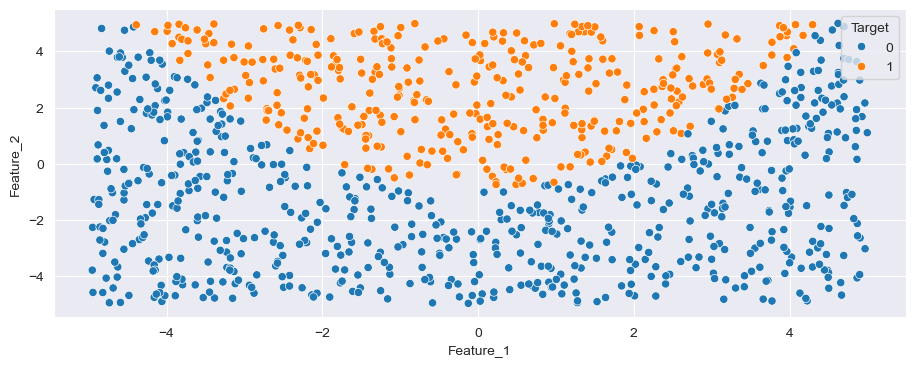

In [165]:
plt.figure(figsize=(11,4))
sns.scatterplot(x="Feature_1", y="Feature_2", data=df, hue='Target')
plt.show()

In [166]:
x = df.drop(columns='Target')
y = df['Target']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Successfully completed.")

Successfully completed.


# LogisticRegression

In [169]:
lor = LogisticRegression()
lor.fit(x_test,y_test)

LogisticRegression()

In [170]:
# Accuracy on test data
print(f"Accuracy: {lor.score(x_test,y_test)*100:.2f}%")

Accuracy: 82.00%


# PolynomialFeatures

In [172]:
pf = PolynomialFeatures(degree=3)
pf.fit(x)

PolynomialFeatures(degree=3)

In [173]:
x_pf = pd.DataFrame(pf.transform(x))
x_pf.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,-1.254599,-3.148671,1.574018,3.950319,9.914127,-1.974761,-4.956065,-12.438252,-31.216322
1,1.0,4.507143,0.419009,20.314339,1.888536,0.175569,91.559630,8.511900,0.791314,0.073565
2,1.0,2.319939,3.729458,5.382119,8.652117,13.908860,12.486190,20.072388,32.267712,51.872513
3,1.0,0.986585,2.322249,0.973350,2.291096,5.392840,0.960292,2.260360,5.320494,12.523516
4,1.0,-3.439814,3.065611,11.832318,-10.545132,9.397974,-40.700967,36.273289,-32.327278,28.810536


In [174]:
# Train Test Split
x_train_pf, x_test_pf, y_train_pf, y_test_pf = train_test_split(
    x_pf, y, train_size=0.8, random_state=42
)


In [175]:
lor = LogisticRegression()
lor.fit(x_train_pf,y_train_pf)

LogisticRegression()

In [176]:
# Accuracy on test data
print(f"Accuracy: {lor.score(x_test_pf, y_test_pf)*100:.2f}%")

Accuracy: 100.00%


# Predict

In [178]:
x_1 = pd.DataFrame(pf.transform([[4.507143, 0.419009]]))

lor.predict(x_1)

array([0], dtype=int64)

In [179]:
x_2 = pd.DataFrame(pf.transform([[2.319939, 3.729458]]))

lor.predict(x_1)


array([0], dtype=int64)

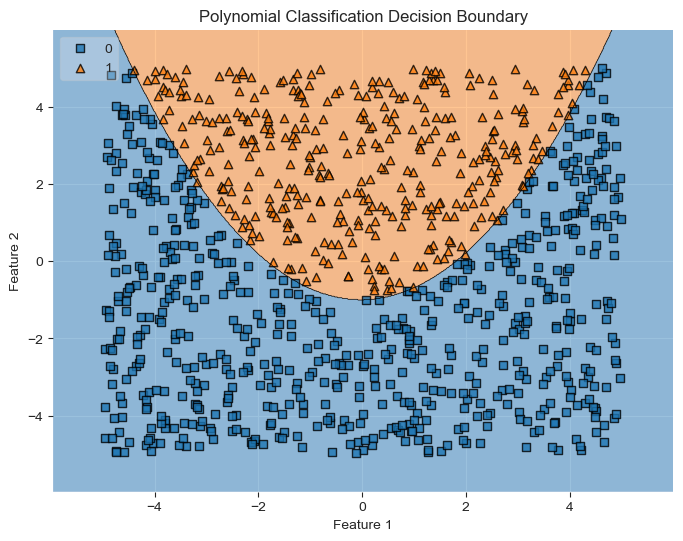

In [180]:
# ==============================
# 1) IMPORT LIBRARIES
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.plotting import plot_decision_regions

# ==============================
# 2) LOAD DATA
# ==============================


X = df[['Feature_1', 'Feature_2']]   # MUST be 2 features
y = df['Target']

# ==============================
# 3) POLYNOMIAL TRANSFORMATION
# ==============================
pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)

# ==============================
# 4) TRAIN MODEL
# ==============================
lor = LogisticRegression(max_iter=2000)
lor.fit(X_poly, y)

# ==============================
# 5) WRAPPER CLASS (FOR PLOTTING)
# ==============================
class PolyLogisticWrapper:
    def __init__(self, model, poly):
        self.model = model
        self.poly = poly

    def predict(self, X):
        X_poly = self.poly.transform(X)
        return self.model.predict(X_poly)

# Wrap model so mlxtend can plot
wrapped_model = PolyLogisticWrapper(lor, pf)

# ==============================
# 6) PLOT DECISION REGIONS
# ==============================
plt.figure(figsize=(8, 6))

plot_decision_regions(
    X=X.to_numpy(),     # ORIGINAL 2D FEATURES
    y=y.to_numpy(),
    clf=wrapped_model,
    legend=2
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Polynomial Classification Decision Boundary")
plt.show()


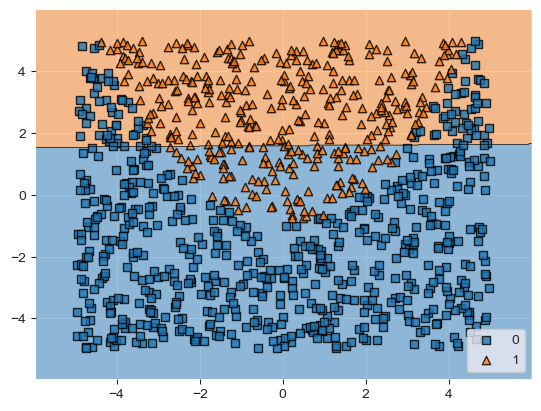

In [181]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# select only two features
X_2d = x.iloc[:, [0, 1]].to_numpy()
y_plot = y.to_numpy()

x_pf = pd.DataFrame(pf.transform(x))
# train a NEW model on only 2 features
lor_2d = LogisticRegression()
lor_2d.fit(X_2d, y_plot)

# plot
plot_decision_regions(X_2d, y_plot, clf=lor_2d)
plt.legend()
plt.show()


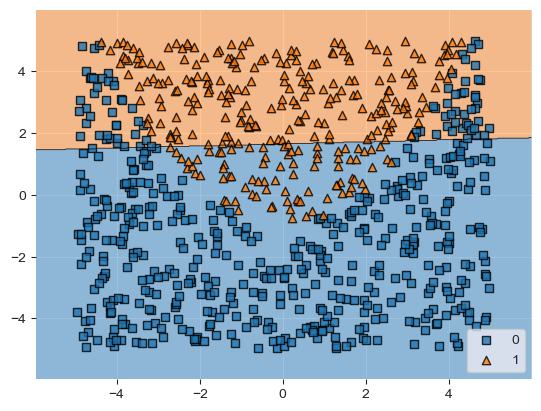

In [182]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Select EXACTLY two features
X_vis = x_train.iloc[:, [0, 1]].to_numpy()
y_vis = y_train.to_numpy()

# Train a new logistic regression ONLY for plotting
lor_vis = LogisticRegression()
lor_vis.fit(X_vis, y_vis)

# Plot decision regions
plot_decision_regions(X_vis, y_vis, clf=lor_vis)
plt.legend()
plt.show()


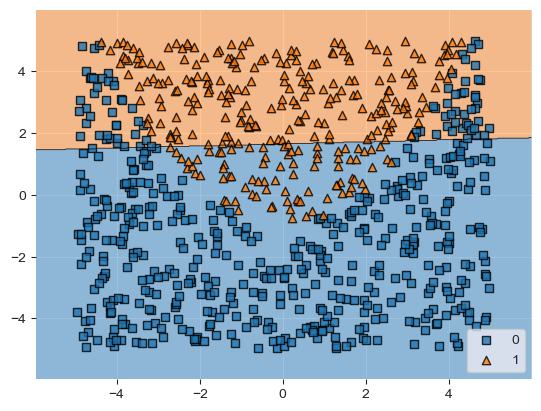

In [183]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Select EXACTLY two features
X_vis = x_train.iloc[:, [0, 1]].to_numpy()
y_vis = y_train.to_numpy()

# Train a new logistic regression ONLY for plotting
lor_vis = LogisticRegression()
lor_vis.fit(X_vis, y_vis)

# Plot decision regions
plot_decision_regions(X_vis, y_vis, clf=lor_vis)
plt.legend()
plt.show()


In [184]:
X_plot

array([[-1.25459881, -3.14867071],
       [ 4.50714306,  0.41900947],
       [ 2.31993942,  3.72945836],
       ...,
       [-3.63181369, -4.31041984],
       [ 4.50237354, -4.42945279],
       [-0.53994227, -2.17812925]])

In [185]:
y_plot

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [186]:
x

,Feature_1,Feature_2
0,-1.254599,-3.148671
1,4.507143,0.419009
2,2.319939,3.729458
3,0.986585,2.322249
4,-3.439814,3.065611
...,...,...
995,-4.084179,1.569552
996,4.173136,4.566146
997,-3.631814,-4.310420
998,4.502374,-4.429453
